In [1]:
import requests
import io
import datetime

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
import pystan

In [3]:
schools_dat = {'J': 8, 'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [4]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [5]:
sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


In [6]:
fit

Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          7.75    0.18   4.95  -2.13   4.82   7.86  10.87  17.37    765   1.01
tau         6.51     0.2   5.37   0.27   2.55    5.3   9.17  19.69    688    1.0
eta[1]      0.42    0.02   0.96  -1.47  -0.25   0.46   1.08   2.25   1771    1.0
eta[2]   -4.8e-3    0.02   0.85  -1.75  -0.58  -0.03   0.57   1.64   2094    1.0
eta[3]     -0.23    0.02   0.93  -2.04  -0.83  -0.23   0.39   1.58   1889    1.0
eta[4]     -0.03    0.02   0.88  -1.73  -0.58  -0.03   0.53    1.7   2015    1.0
eta[5]     -0.34    0.02   0.89  -2.04  -0.92  -0.36   0.22   1.45   1694    1.0
eta[6]     -0.21    0.02   0.87  -1.91   -0.8  -0.19   0.37   1.47   1782    1.0
eta[7]      0.36    0.02   0.88  -1.46  -0.19   0.35   0.95   1.98   1818    1.0
eta

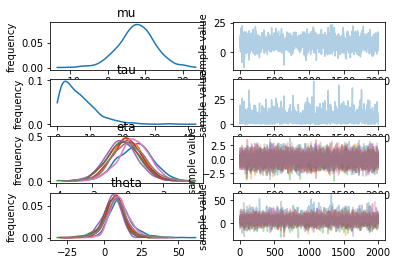

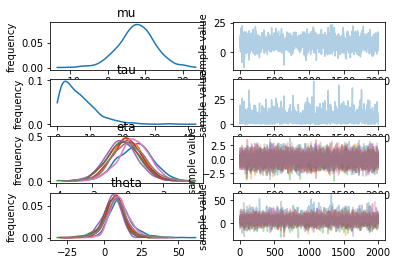

In [7]:
fit.plot()